# $Lab 1$

this time is for verifying the law of convolution, first of all the solving, we need to import the related library to be the support for the lab.

and the question is about this function:

$$
f(t) = \left\{
    \begin{matrix}
       E (1 - \frac{2|t|}{\tau}), &  |t| \le \frac{\tau}{2}  \\
        0, &otherwise
    \end{matrix}
    \right.
$$
with $E = 1$ and $\tau = 1$, for $t \in [-1, 1]$ and $w \in [-50, 50]$

In [11]:

import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
%matplotlib inline

### Q1:Determine $g(t)$ that satisfies $f(t) = g(t) * g(t)$

after we calculating, we can easily find that the $g(t)$ is:
$$
g(t) = \left\{
    \begin{matrix}
        \sqrt{\frac{2E}{\tau}}, & |t| \le \frac{\tau}{4} \\
        0, & otherwise
    \end{matrix}
    \right.
$$

### Q2: Plot f(t) and g(t)

In order to solve this question, we need to sample enough points and display them while we need to define the function f(t) and g(t)

In [2]:
tau = 1.0
E = 1.0

def f(t):
    t = abs(t)
    if (t < tau / 2.0):
        return E * (1.0 - (2.0 * t) / tau)
    else:
        return 0.0

def g(t):
    t = abs(t)
    if (t < tau / 4.0):
        return np.sqrt(2.0 * E / tau)
    else:
        return 0.0


After the definition, we can easily plot the figure by using the `plt`

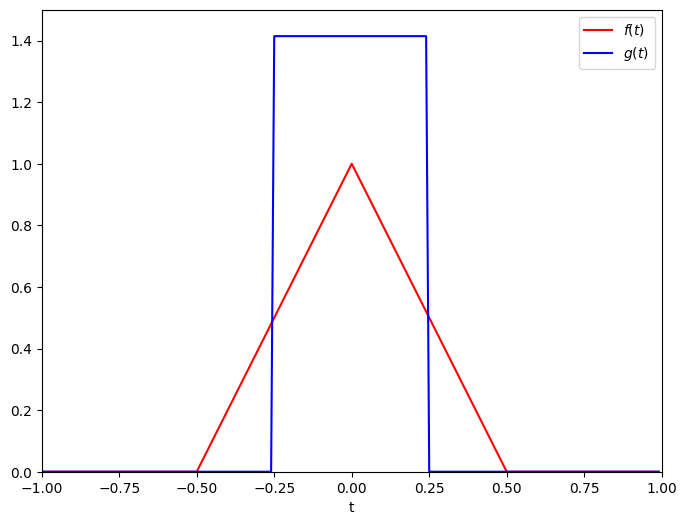

In [3]:
t2 = np.arange(-1, 1, 0.01)
fvec = np.vectorize(f)
gvec = np.vectorize(g)
ft2 = fvec(t2)
gt2 = gvec(t2)

plt.figure(figsize = (8,6))
plt.plot(t2, ft2, color = 'r', label = '$f(t)$')
plt.plot(t2, gt2, color = 'b', label = '$g(t)$')
plt.xlabel('t')
plt.xlim([-1, 1])
plt.ylim([0, 1.5])
plt.legend()
plt.show()

### Q3:Plot $F(w).G(w)$ and $G_e(w) = G(w) * G(w)$

In order to solve the problem we need to import some functions from `./HUST_lab0.ipyb`,and then convert them for our own solving for this problem


In [4]:
N = 500              
K = 1000

def func3_FT_for_ft(t1, t2, w1, w2):
    deltT = (t2 - t1) / N 
    deltW = (w2 - w1) / K
    
    f = np.arange(0, N, 1)
    f = t1 + f * deltT
    f = fvec(f)
    
    w = np.arange(0, K, 1)
    w = w1 + w * deltW
    w.shape = (1,K)
    t = np.arange(0, N, 1)
    t = t1 + t * deltT
    a = np.kron(w.T, t)
    a = np.exp(- a * complex(0, 1))
    
    rv = (t2 - t1) / N * np.dot(a, f.T)
    return rv


def func3_FT_for_gt(t1, t2, w1, w2):
    deltT = (t2 - t1) / N 
    deltW = (w2 - w1) / K
    
    f = np.arange(0, N, 1)
    f = t1 + f * deltT
    f = gvec(f)
    
    w = np.arange(0, K, 1)
    w = w1 + w * deltW
    w.shape = (1,K)
    t = np.arange(0, N, 1)
    t = t1 + t * deltT
    a = np.kron(w.T, t)
    a = np.exp(- a * complex(0, 1))
    
    rv = (t2 - t1) / N * np.dot(a, f.T)
    return rv

after the convertion, we can solve the problem by calling them for having the target groups for ploting the figure.

the three figures are 
1. $F(w)$
2. $G(w)$
3. $G_e(w) = G(w) * G(w)$

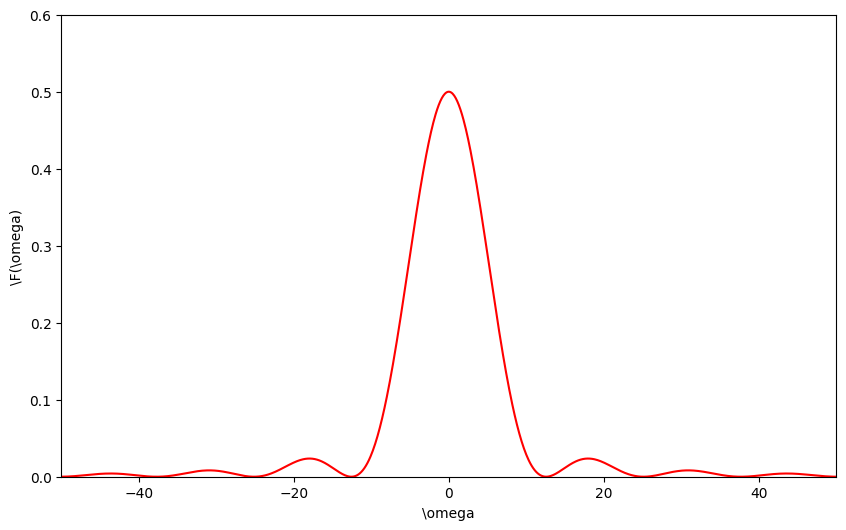

In [5]:
Fw3_fun3 = func3_FT_for_ft(-1 ,1, -50, 50)
Fw3 = np.real(Fw3_fun3)
n = np.arange(-50, 50, (100) / K)
plt.figure(figsize = (10, 6))
plt.plot(n, Fw3, color = 'r')
plt.xlim([-50, 50])
plt.ylim([0, 0.6])
plt.xlabel('\omega')
plt.ylabel('\F(\omega)')
plt.show()

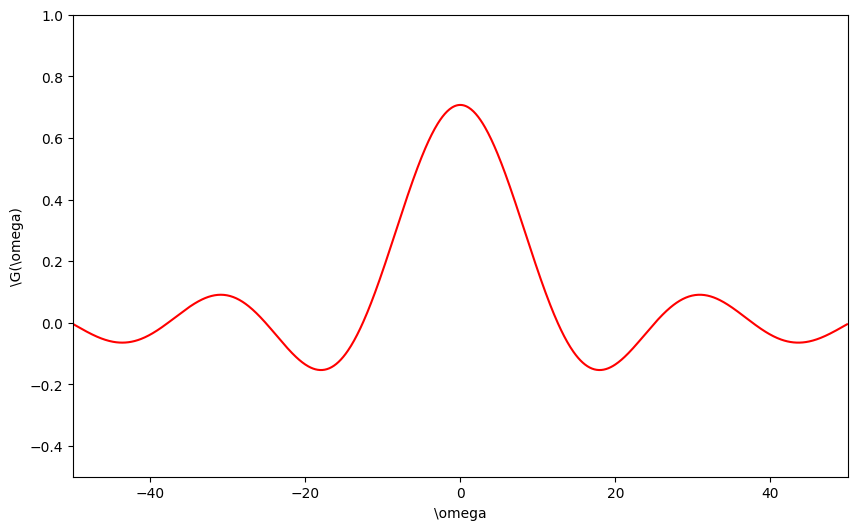

In [6]:
Gw3_fun3 = func3_FT_for_gt(-1 ,1, -50, 50)
Gw3 = np.real(Gw3_fun3)
n = np.arange(-50, 50, (100) / K)
plt.figure(figsize = (10, 6))
plt.plot(n, Gw3, color = 'r')
plt.xlim([-50, 50])
plt.ylim([-0.5, 1])
plt.xlabel('\omega')
plt.ylabel('\G(\omega)')
plt.show()

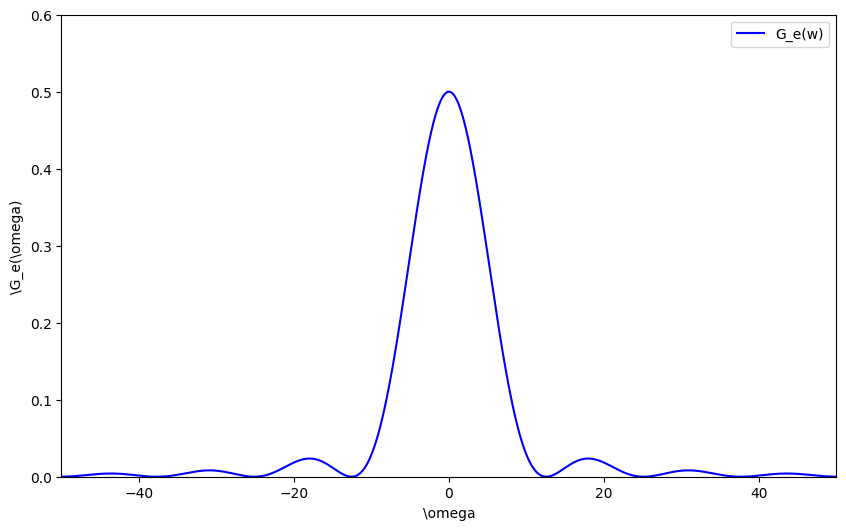

In [7]:
Gw23_fun = Gw3_fun3 * Gw3_fun3
Gw23 = np.real(Gw23_fun)
n = np.arange(-50, 50, (100) / K)
plt.figure(figsize = (10, 6))
plt.plot(n, Gw23, color = 'b', label = 'G_e(w)')
plt.xlim([-50, 50])
plt.ylim([0, 0.6])
plt.xlabel('\omega')
plt.ylabel('\G_e(\omega)')
plt.legend()
plt.show()

### Q4: Plot $F_e(w) = FT\{g(t) * g(t)\}$;

In order to solve the problem, we need to define the function $g(t) * g(t)$, and then use the new function to make the fourier transform, and then plot them.

$$
let \, func(t) = g(t) * g(t) \\
then \, \, func(t) = T \sum_{k = -m}^{m} g(kT)g(t-KT)
$$

In [8]:
def func(t):
    T = 0.0001
    m = int((tau / 4) / T)
    rv = 0.0
    for k in range(-m, m, 1):
        rv += g(k * T) * g(t - k * T)
    return rv * T
funcvec = np.vectorize(func)

def func3_FT_for_funct(t1, t2, w1, w2):
    deltT = (t2 - t1) / N 
    deltW = (w2 - w1) / K
    
    f = np.arange(0, N, 1)
    f = t1 + f * deltT
    f = funcvec(f)
    
    w = np.arange(0, K, 1)
    w = w1 + w * deltW
    w.shape = (1,K)
    t = np.arange(0, N, 1)
    t = t1 + t * deltT
    a = np.kron(w.T, t)
    a = np.exp(- a * complex(0, 1))
    
    rv = (t2 - t1) / N * np.dot(a, f.T)
    return rv

after the definition, we can easily have the plot $F_e(w)$

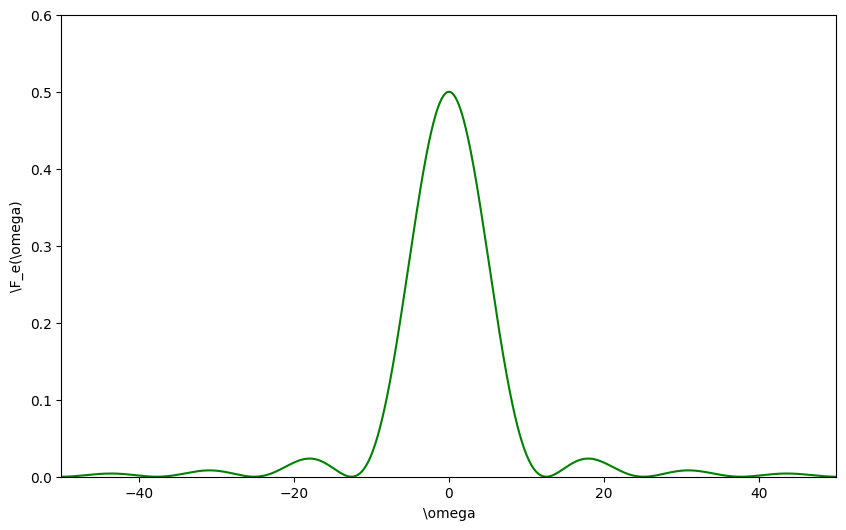

In [9]:
Few3_fun3 = func3_FT_for_funct(-1 ,1, -50, 50)
Few3 = np.real(Few3_fun3)
n = np.arange(-50, 50, (100) / K)
plt.figure(figsize = (10, 6))
plt.plot(n, Few3, color = 'g', label = '\F_e(\omega)')
plt.xlim([-50, 50])
plt.ylim([0, 0.6])
plt.xlabel('\omega')
plt.ylabel('\F_e(\omega)')
plt.show()

### Q5: Compare $F(w). G_e(w), F_e(w)$

plot them in the same figure

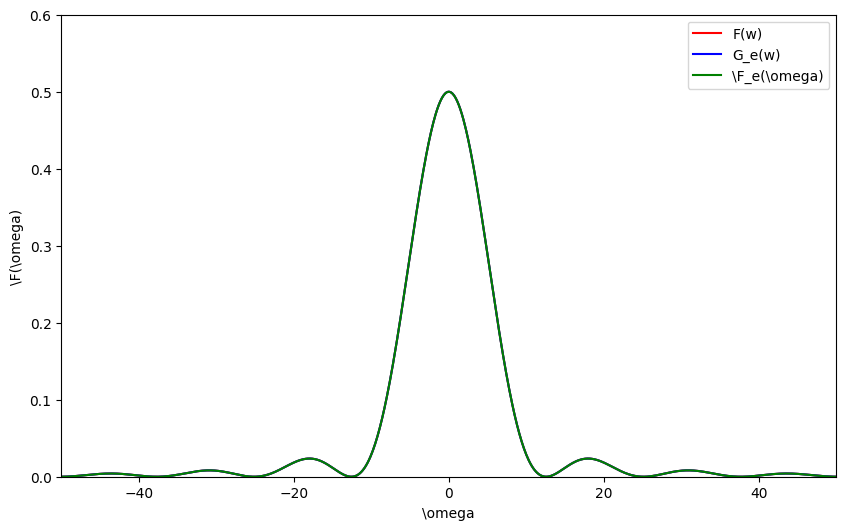

In [10]:
plt.figure(figsize = (10, 6))
plt.plot(n, Fw3, color = 'r', label = 'F(w)')
plt.plot(n, Gw23, color = 'b', label = 'G_e(w)')
plt.plot(n, Few3, color = 'g', label = '\F_e(\omega)')
plt.xlim([-50, 50])
plt.ylim([0, 0.6])
plt.xlabel('\omega')
plt.ylabel('\F(\omega)')
plt.legend()
plt.show()

From the figure, we have the view, they are all the same.

**Lab1 is over!**